<a href="https://colab.research.google.com/github/SiraHaruethaipree/Thai-Question-Answering-huggingface/blob/main/Thaiqa_fine_tune.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=2524da19b94c7e6766290a4aa013b33e6cf8ad0f6fd61e2fff972b27b700161d
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [ ]:
!pip install datasets evaluate transformers[sentencepiece]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 365 kB 14.5 MB/s 
     |████████████████████████████████| 69 kB 7.7 MB/s 
     |████████████████████████████████| 4.7 MB 67.6 MB/s 
     |████████████████████████████████| 120 kB 72.0 MB/s 
     |████████████████████████████████| 212 kB 71.9 MB/s 
     |████████████████████████████████| 115 kB 74.9 MB/s 
     |████████████████████████████████| 127 kB 54.3 MB/s 
     |████████████████████████████████| 6.6 MB 50.3 MB/s 
     |████████████████████████████████| 1.3 MB 54.2 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


In [ ]:
!git config --global user.email "you@example.com"
!git config --global user.name "Your Name"
from huggingface_hub import notebook_login

notebook_login()

In [ ]:
from datasets import load_dataset
import json
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
from collections import Counter

In [ ]:
import os
import wget

def bar_custom(current, total, width=80):
    print("Downloading: %d%% [%d / %d] bytes" % (current / total * 100, current, total))

URL = "https://raw.githubusercontent.com/iapp-technology/iapp-wiki-qa-dataset/main/iapp-thai-wikipedia-qa-1961-docs-9170-questions.json"
if not os.path.exists("scan.jpeg"):
    wget.download(URL,bar=bar_custom)

Downloading: 0% [0 / 12097716] bytes
Downloading: 0% [8192 / 12097716] bytes
Downloading: 0% [16384 / 12097716] bytes
Downloading: 0% [24576 / 12097716] bytes
Downloading: 0% [32768 / 12097716] bytes
Downloading: 0% [40960 / 12097716] bytes
Downloading: 0% [49152 / 12097716] bytes
Downloading: 0% [57344 / 12097716] bytes
Downloading: 0% [65536 / 12097716] bytes
Downloading: 0% [73728 / 12097716] bytes
Downloading: 0% [81920 / 12097716] bytes
Downloading: 0% [90112 / 12097716] bytes
Downloading: 0% [98304 / 12097716] bytes
Downloading: 0% [106496 / 12097716] bytes
Downloading: 0% [114688 / 12097716] bytes
Downloading: 1% [122880 / 12097716] bytes
Downloading: 1% [131072 / 12097716] bytes
Downloading: 1% [139264 / 12097716] bytes
Downloading: 1% [147456 / 12097716] bytes
Downloading: 1% [155648 / 12097716] bytes
Downloading: 1% [163840 / 12097716] bytes
Downloading: 1% [172032 / 12097716] bytes
Downloading: 1% [180224 / 12097716] bytes
Downloading: 1% [188416 / 12097716] bytes
Downloadin

In [ ]:
#load dataset
with open('iapp-thai-wikipedia-qa-1961-docs-9170-questions.json','r') as f:
    j = json.load(f)
list(j['db'].keys())[:10]

['01KZTrxgvC5mOovXFMPJ',
 '01asKzWKkocCMjZAITfL',
 '03Ezpc2OXtjeS6EVN4fi',
 '03xHGzW2DvkChsaT5dLb',
 '04BmI3HcGl4MpdzMikX1',
 '05JQW7q0XQOZwbsAocxt',
 '05Vid2v4a9EZBdOZpdVD',
 '071imckvqaBULVkHpFoe',
 '07a7HD6G4jvukeSYtkvz',
 '0D2kcaAC4m9Der4cmG7G']

In [ ]:
len(list(j['db'].keys()))

1962

In [ ]:
#data is stored at context level
#some questions have more than one answer; we filter then out
article_id = 'yLfGJ35d5aLhD16TGNOV'
article = j['db'][article_id]
article

{'createOn': '2019-08-23 15:57:45.947000+00:00',
 'isPay': {'date': None, 'status': False},
 'uid': 'yLfGJ35d5aLhD16TGNOV',
 'title': 'คนกับควาย',
 'textDetector': [{'text': '', 'start': 0, 'end': 0},
  {'text': 'เป็นเพลงเพื่อชีวิตที่มีชื่อเสียงของวง', 'start': 10, 'ending': 46},
  {'text': 'วงคาราวาน', 'start': 45, 'ending': 53},
  {'text': 'สุรชัย จันทิมาธร', 'start': 66, 'ending': 81},
  {'text': 'คนกับควาย', 'start': 66, 'ending': 81},
  {'text': 'บ็อบ ไดแลน', 'start': 116, 'ending': 125},
  {'ending': 146, 'text': 'แต่งคำร้องภาษาไทยโดย', 'start': 127},
  {'start': 148, 'ending': 158, 'text': 'สมคิด สิงสง'},
  {'text': 'ได้แสดงสู่สาธารณะเป็นครั้งแรก โดย', 'start': 491, 'ending': 523},
  {'start': 524, 'ending': 539, 'text': 'สุรชัย จันทิมาธร'},
  {'start': 544, 'ending': 554, 'text': 'วิสา คัญทัพ'}],
 'detail': 'คนกับควาย เป็นเพลงเพื่อชีวิตที่มีชื่อเสียงของวงคาราวาน ขับร้องโดย สุรชัย จันทิมาธร จากทำนองเพลง "Master of War" ของ บ็อบ ไดแลน แต่งคำร้องภาษาไทยโดย สมคิด สิงสง\n\nได้ฟังเพล

In [ ]:
#extract questions that have only one, non-empty answer
db = j['db']

reses = []
for article_id in tqdm(list(db.keys())):
    article = db[article_id]
    context = article.get('detail',False)
    #check if article exists
    if not context: continue
    qas = article['QA']
    textdetectors = article['textDetector']
    #generate dict
    textdetectors_d ={}
    for t in textdetectors:
        textdetectors_d[t['text']] = {'answer_start': t.get('start'), 'answer_end':t.get('ending', False) or t.get('end')}
    #append instance to reses
    for i in range(len(qas)):
        qa = qas[i]
        #keep only single answer questions
        if len(qa['a'])>1: continue
        #keep only non-empty questions and answers
        if (len(qa['q'])==0) or (len(qa['a'])==0): continue
        res = {
            'article_id': article_id,
            'question_id': f'{article_id}_{str(i).zfill(3)}',
            'context': context,
            'question': qa['q'],
            'answers': {
                'text': qa['a'],
                'answer_start': [textdetectors_d[qa['a'][0]]['answer_start']],
                'answer_end': [textdetectors_d[qa['a'][0]]['answer_end']+1]
            },
            'title': article['title'],
            'created_by': article['createBy'],
            'created_on': article['createOn'],
            'is_pay': article['isPay']
        }
        reses.append(res)

  0%|          | 0/1962 [00:00<?, ?it/s]

In [ ]:
len(reses)

7930

((array([4189.,    0.,    8.,    0.,   89.,    0.,  167.,    0.,  231.,
         3246.]),
  array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 ]),
  <a list of 10 Patch objects>),
 8920.5)

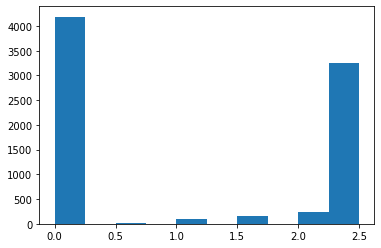

In [ ]:
# costs for constructing dataset
totals = []
for res in reses:
    if res['is_pay']['status']:
        totals.append(res['is_pay']['total'])
    else:
        totals.append(0)
plt.hist(totals), sum(totals)

In [ ]:
raw_datasets = load_dataset("iapp_wiki_qa_squad")

Generating train split:   0%|          | 0/5761 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/742 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/739 [00:00<?, ? examples/s]

Dataset iapp_wiki_qa_squad downloaded and prepared to /root/.cache/huggingface/datasets/iapp_wiki_qa_squad/iapp_wiki_qa_squad/1.0.0/c1455d806e5a66ca9ee5c03b4aeaeaef4410afca6263c0bfb440ff1db28e20c3. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
raw_datasets

DatasetDict({
    train: Dataset({
        features: ['question_id', 'article_id', 'title', 'context', 'question', 'answers'],
        num_rows: 5761
    })
    validation: Dataset({
        features: ['question_id', 'article_id', 'title', 'context', 'question', 'answers'],
        num_rows: 742
    })
    test: Dataset({
        features: ['question_id', 'article_id', 'title', 'context', 'question', 'answers'],
        num_rows: 739
    })
})

In [ ]:
print("Context: ", raw_datasets["train"][0]["context"])
print("Question: ", raw_datasets["train"][0]["question"])
print("Answer: ", raw_datasets["train"][0]["answers"])

Context:  พัทธ์ธีรา ศรุติพงศ์โภคิน (เกิด 3 ธันวาคม พ.ศ. 2533) หรือชื่อเล่นว่า อร เป็นนักแสดงหญิงชาวไทย สำเร็จมัธยมศึกษาจากCatholic Cathedral College ประเทศนิวซีแลนด์ และปริญญาตรีจากRaffles International College สาขา Business Marketing

เข้าสู่วงการตั้งแต่อายุ 6 ขวบ จากการแสดงละครเวทีกับ ครูชลประคัลภ์ จันทร์เรือง จากนั้นก็เล่นโฆษณาในวัยเด็ก 2- 3 ชิ้น และยังเคยแสดงช่วงละครสั้น ในรายการซุปเปอร์จิ๋ว ประมาณปี 2542

ปัจจุบันเป็นทั้ง นักแสดง , พิธีกร และ วีเจ อยู่ที่คลื่น เก็ท 102.5 Bangkok International Hits Music Station และยังเป็นพิธีกรให้กับช่อง ทรู มิวสิก
Question:  พัทธ์ธีรา ศรุติพงศ์โภคิน เกิดวันที่เท่าไร
Answer:  {'text': ['3 ธันวาคม พ.ศ. 2533'], 'answer_start': [31], 'answer_end': [50]}


In [ ]:
raw_datasets["train"].filter(lambda x: len(x["answers"]["text"]) != 1)

  0%|          | 0/6 [00:00<?, ?ba/s]

Dataset({
    features: ['question_id', 'article_id', 'title', 'context', 'question', 'answers'],
    num_rows: 0
})

In [ ]:
print(raw_datasets["validation"][0]["answers"])
print(raw_datasets["validation"][2]["answers"])

{'text': ['1 พฤศจิกายน พ.ศ. 2476'], 'answer_start': [24], 'answer_end': [45]}
{'text': ['พ.ศ. 2529'], 'answer_start': [274], 'answer_end': [283]}


In [ ]:
print(raw_datasets["validation"][2]["context"])
print(raw_datasets["validation"][2]["question"])

นายสุวัฒน์ วรรณศิริกุล (1 พฤศจิกายน พ.ศ. 2476 - 31 กรกฎาคม พ.ศ. 2555) อดีตรองหัวหน้าพรรคพลังประชาชน อดีตประธานสมาชิกสภาผู้แทนราษฎร และประธานภาคกรุงเทพมหานคร พรรคพลังประชาชน อดีตสมาชิกสภาผู้แทนราษฎรกรุงเทพมหานครหลายสมัย ได้รับการเลือกตั้งเป็นสมาชิกสภาผู้แทนราษฎรครั้งแรกในปี พ.ศ. 2529 ในสังกัดพรรคประชากรไทย และสังกัดพรรคพลังประชาชน เป็นพรรคสุดท้าย
สุวัฒน์ วรรณศิริกุล ได้รับการเลือกตั้งเป็นสมาชิกสภาผู้แทนราษฎรครั้งแรกในปีอะไร


In [ ]:
from transformers import AutoTokenizer

model_checkpoint = "airesearch/wangchanberta-base-wiki-20210520-spm-finetune-qa"
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)

In [ ]:
context = raw_datasets["train"][0]["context"]
question = raw_datasets["train"][0]["question"]

inputs = tokenizer(question, context)
tokenizer.decode(inputs["input_ids"])

'<s> พัทธ์ธีรา ศรุติพงศ์โภคิน เกิดวันที่เท่าไร</s></s> พัทธ์ธีรา ศรุติพงศ์โภคิน (เกิด 3 ธันวาคม พ.ศ. 2533) หรือชื่อเล่นว่า อร เป็นนักแสดงหญิงชาวไทย สําเร็จมัธยมศึกษาจากCatholic Cathedral College ประเทศนิวซีแลนด์ และปริญญาตรีจากRaffles International College สาขา Business Marketing เข้าสู่วงการตั้งแต่อายุ 6 ขวบ จากการแสดงละครเวทีกับ ครูชลประคัลภ์ จันทร์เรือง จากนั้นก็เล่นโฆษณาในวัยเด็ก 2- 3 ชิ้น และยังเคยแสดงช่วงละครสั้น ในรายการซุปเปอร์จิ๋ว ประมาณปี 2542 ปัจจุบันเป็นทั้ง นักแสดง, พิธีกร และ วีเจ อยู่ที่คลื่น เก็ท 102.5 Bangkok International Hits Music Station และยังเป็นพิธีกรให้กับช่อง ทรู มิวสิก</s>'

In [ ]:
inputs

{'input_ids': [5, 8, 15133, 5767, 9, 8, 23991, 1291, 2359, 14712, 3253, 8, 2432, 9682, 6, 6, 8, 15133, 5767, 9, 8, 23991, 1291, 2359, 14712, 3253, 8, 15, 184, 8, 46, 8, 278, 8, 20, 10, 16, 10, 8, 2860, 18, 8, 28, 2464, 38, 8, 2416, 8, 14, 594, 16163, 8, 326, 1037, 26, 18011, 17439, 1171, 8, 6101, 588, 11768, 891, 8, 8423, 8, 63, 3583, 8, 11, 1361, 26, 578, 12488, 7292, 8, 3107, 3894, 8, 8423, 8, 423, 8, 16752, 8, 23026, 664, 8, 4289, 27, 132, 563, 8, 104, 8, 3936, 8, 12813, 4844, 30, 8, 783, 4159, 875, 5578, 1761, 477, 8, 1814, 4021, 8, 4434, 527, 1765, 6506, 8, 36, 31, 8, 46, 8, 1617, 8, 11, 6991, 352, 450, 945, 1000, 8, 1631, 8210, 7950, 8, 8879, 8, 1924, 8, 100, 11485, 8, 594, 8, 24, 8, 3697, 8, 11, 8, 497, 643, 8, 544, 1410, 8, 15673, 96, 8, 143, 5160, 8, 18233, 8, 3107, 3894, 8, 20853, 70, 8, 4888, 8, 17910, 8, 1607, 6688, 291, 519, 8, 4465, 8, 1538, 6], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [ ]:
inputs = tokenizer(
    question,
    context,
    max_length=100,
    truncation="only_second",
    stride=50,
    return_overflowing_tokens=True,
)

for ids in inputs["input_ids"]:
    print(tokenizer.decode(ids))

<s> พัทธ์ธีรา ศรุติพงศ์โภคิน เกิดวันที่เท่าไร</s></s> พัทธ์ธีรา ศรุติพงศ์โภคิน (เกิด 3 ธันวาคม พ.ศ. 2533) หรือชื่อเล่นว่า อร เป็นนักแสดงหญิงชาวไทย สําเร็จมัธยมศึกษาจากCatholic Cathedral College ประเทศนิวซีแลนด์ และปริญญาตรีจากRaffles International College สาขา Business Marketing เข้าสู่วงการตั้งแต่อายุ 6 ขวบ จากการแสดงละครเวที</s>
<s> พัทธ์ธีรา ศรุติพงศ์โภคิน เกิดวันที่เท่าไร</s></s>นักแสดงหญิงชาวไทย สําเร็จมัธยมศึกษาจากCatholic Cathedral College ประเทศนิวซีแลนด์ และปริญญาตรีจากRaffles International College สาขา Business Marketing เข้าสู่วงการตั้งแต่อายุ 6 ขวบ จากการแสดงละครเวทีกับ ครูชลประคัลภ์ จันทร์เรือง จากนั้นก็เล่นโฆษณาในวัยเด็ก 2- 3 ชิ้น และยังเคยแสดงช่วงละครสั้น ในรายการซุปเปอร์</s>
<s> พัทธ์ธีรา ศรุติพงศ์โภคิน เกิดวันที่เท่าไร</s></s> Business Marketing เข้าสู่วงการตั้งแต่อายุ 6 ขวบ จากการแสดงละครเวทีกับ ครูชลประคัลภ์ จันทร์เรือง จากนั้นก็เล่นโฆษณาในวัยเด็ก 2- 3 ชิ้น และยังเคยแสดงช่วงละครสั้น ในรายการซุปเปอร์จิ๋ว ประมาณปี 2542 ปัจจุบันเป็นทั้ง นักแสดง, พิธีกร และ วีเจ อยู่ที่ค

In [ ]:
inputs = tokenizer(
    question,
    context,
    max_length=100,
    truncation="only_second",
    stride=50,
    return_overflowing_tokens=True, #
    return_offsets_mapping=True, #
)
inputs.keys()

dict_keys(['input_ids', 'attention_mask', 'offset_mapping', 'overflow_to_sample_mapping'])

In [ ]:
inputs = tokenizer(
    raw_datasets["train"][2:6]["question"],
    raw_datasets["train"][2:6]["context"],
    max_length=100,
    truncation="only_second",
    stride=50,
    return_overflowing_tokens=True,
    return_offsets_mapping=True,
)

print(f"The 4 examples gave {len(inputs['input_ids'])} features.")
print(f"Here is where each comes from: {inputs['overflow_to_sample_mapping']}.")

The 4 examples gave 22 features.
Here is where each comes from: [0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3].


In [ ]:
for ids in inputs["input_ids"][:]:
    print(tokenizer.decode(ids))

<s> พัทธ์ธีรา ศรุติพงศ์โภคิน ทําอาชีพอะไร</s></s> พัทธ์ธีรา ศรุติพงศ์โภคิน (เกิด 3 ธันวาคม พ.ศ. 2533) หรือชื่อเล่นว่า อร เป็นนักแสดงหญิงชาวไทย สําเร็จมัธยมศึกษาจากCatholic Cathedral College ประเทศนิวซีแลนด์ และปริญญาตรีจากRaffles International College สาขา Business Marketing เข้าสู่วงการตั้งแต่อายุ 6 ขวบ จากการแสดง</s>
<s> พัทธ์ธีรา ศรุติพงศ์โภคิน ทําอาชีพอะไร</s></s>เป็นนักแสดงหญิงชาวไทย สําเร็จมัธยมศึกษาจากCatholic Cathedral College ประเทศนิวซีแลนด์ และปริญญาตรีจากRaffles International College สาขา Business Marketing เข้าสู่วงการตั้งแต่อายุ 6 ขวบ จากการแสดงละครเวทีกับ ครูชลประคัลภ์ จันทร์เรือง จากนั้นก็เล่นโฆษณาในวัยเด็ก 2- 3 ชิ้น และยังเคยแสดงช่วงละครสั้น </s>
<s> พัทธ์ธีรา ศรุติพงศ์โภคิน ทําอาชีพอะไร</s></s> สาขา Business Marketing เข้าสู่วงการตั้งแต่อายุ 6 ขวบ จากการแสดงละครเวทีกับ ครูชลประคัลภ์ จันทร์เรือง จากนั้นก็เล่นโฆษณาในวัยเด็ก 2- 3 ชิ้น และยังเคยแสดงช่วงละครสั้น ในรายการซุปเปอร์จิ๋ว ประมาณปี 2542 ปัจจุบันเป็นทั้ง นักแสดง, พิธีกร และ วีเจ อยู่ที่คลื่น เก็ท 102.5 Bangkok</s>

In [ ]:
answers = raw_datasets["train"][2:6]["answers"]
start_positions = []
end_positions = []

for i, offset in enumerate(inputs["offset_mapping"]):
    sample_idx = inputs["overflow_to_sample_mapping"][i]
    answer = answers[sample_idx]
    start_char = answer["answer_start"][0] #start index answer
    end_char = answer["answer_start"][0] + len(answer["text"][0]) # + number of text
    sequence_ids = inputs.sequence_ids(i)

    # Find the start and end of the context
    idx = 0
    while sequence_ids[idx] != 1:
        idx += 1
    context_start = idx
    while sequence_ids[idx] == 1:
        idx += 1
    context_end = idx - 1

    # If the answer is not fully inside the context, label is (0, 0)
    if offset[context_start][0] > start_char or offset[context_end][1] < end_char:
        start_positions.append(0)
        end_positions.append(0)
    else:
        # Otherwise it's the start and end token positions
        idx = context_start
        while idx <= context_end and offset[idx][0] <= start_char:
            idx += 1
        start_positions.append(idx - 1)

        idx = context_end
        while idx >= context_start and offset[idx][1] >= end_char:
            idx -= 1
        end_positions.append(idx + 1)

start_positions, end_positions

([50, 18, 0, 0, 67, 35, 0, 0, 0, 65, 24, 0, 0, 0, 0, 0, 0, 72, 32, 0, 0, 0],
 [51, 19, 0, 0, 68, 36, 0, 0, 0, 72, 31, 0, 0, 0, 0, 0, 0, 75, 35, 0, 0, 0])

In [ ]:
idx = 0
sample_idx = inputs["overflow_to_sample_mapping"][idx]
answer = answers[sample_idx]["text"][0]

start = start_positions[idx]
end = end_positions[idx]
labeled_answer = tokenizer.decode(inputs["input_ids"][idx][start : end + 1])

print(f"Theoretical answer: {answer}, labels give: {labeled_answer}")

Theoretical answer: นักแสดงหญิงชาวไทย, labels give: นักแสดงหญิงชาวไทย


In [ ]:
tokenizer.decode(inputs["input_ids"][0])

'<s> พัทธ์ธีรา ศรุติพงศ์โภคิน ทําอาชีพอะไร</s></s> พัทธ์ธีรา ศรุติพงศ์โภคิน (เกิด 3 ธันวาคม พ.ศ. 2533) หรือชื่อเล่นว่า อร เป็นนักแสดงหญิงชาวไทย สําเร็จมัธยมศึกษาจากCatholic Cathedral College ประเทศนิวซีแลนด์ และปริญญาตรีจากRaffles International College สาขา Business Marketing เข้าสู่วงการตั้งแต่อายุ 6 ขวบ จากการแสดง</s>'

In [ ]:
idx = 4
sample_idx = inputs["overflow_to_sample_mapping"][idx]
answer = answers[sample_idx]["text"][0]

decoded_example = tokenizer.decode(inputs["input_ids"][idx])
print(f"Theoretical answer: {answer}, decoded example: {decoded_example}")

Theoretical answer: ประเทศนิวซีแลนด์, decoded example: <s> พัทธ์ธีรา ศรุติพงศ์โภคิน จบการศึกษาจากประเทศอะไร</s></s> พัทธ์ธีรา ศรุติพงศ์โภคิน (เกิด 3 ธันวาคม พ.ศ. 2533) หรือชื่อเล่นว่า อร เป็นนักแสดงหญิงชาวไทย สําเร็จมัธยมศึกษาจากCatholic Cathedral College ประเทศนิวซีแลนด์ และปริญญาตรีจากRaffles International College สาขา Business Marketing เข้าสู่วงการตั้งแต่อายุ 6 ขวบ จากการแสดง</s>


In [ ]:
max_length = 384
stride = 128


def preprocess_training_examples(examples):
    questions = [q.strip() for q in examples["question"]]
    inputs = tokenizer(
        questions,
        examples["context"],
        max_length=max_length,
        truncation="only_second",
        stride=stride,
        return_overflowing_tokens=True,
        return_offsets_mapping=True,
        padding="max_length",
    )

    offset_mapping = inputs.pop("offset_mapping")
    sample_map = inputs.pop("overflow_to_sample_mapping")
    answers = examples["answers"]
    start_positions = []
    end_positions = []

    for i, offset in enumerate(offset_mapping):
        sample_idx = sample_map[i]
        answer = answers[sample_idx]
        start_char = answer["answer_start"][0]
        end_char = answer["answer_start"][0] + len(answer["text"][0])
        sequence_ids = inputs.sequence_ids(i)

        # Find the start and end of the context
        idx = 0
        while sequence_ids[idx] != 1:
            idx += 1
        context_start = idx
        while sequence_ids[idx] == 1:
            idx += 1
        context_end = idx - 1

        # If the answer is not fully inside the context, label is (0, 0)
        if offset[context_start][0] > start_char or offset[context_end][1] < end_char:
            start_positions.append(0)
            end_positions.append(0)
        else:
            # Otherwise it's the start and end token positions
            idx = context_start
            while idx <= context_end and offset[idx][0] <= start_char:
                idx += 1
            start_positions.append(idx - 1)

            idx = context_end
            while idx >= context_start and offset[idx][1] >= end_char:
                idx -= 1
            end_positions.append(idx + 1)

    inputs["start_positions"] = start_positions
    inputs["end_positions"] = end_positions
    return inputs

In [ ]:
train_dataset = raw_datasets["train"].map(
    preprocess_training_examples,
    batched=True,
    remove_columns=raw_datasets["train"].column_names,
)
len(raw_datasets["train"]), len(train_dataset)

  0%|          | 0/6 [00:00<?, ?ba/s]

(5761, 7273)

In [ ]:
def preprocess_validation_examples(examples):
    questions = [q.strip() for q in examples["question"]]
    inputs = tokenizer(
        questions,
        examples["context"],
        max_length=max_length,
        truncation="only_second",
        stride=stride,
        return_overflowing_tokens=True,
        return_offsets_mapping=True,
        padding="max_length",
    )

    sample_map = inputs.pop("overflow_to_sample_mapping")
    example_ids = []

    for i in range(len(inputs["input_ids"])):
        sample_idx = sample_map[i]
        example_ids.append(examples["question_id"][sample_idx])

        sequence_ids = inputs.sequence_ids(i)
        offset = inputs["offset_mapping"][i]
        inputs["offset_mapping"][i] = [
            o if sequence_ids[k] == 1 else None for k, o in enumerate(offset)
        ]

    inputs["example_id"] = example_ids
    return inputs

In [ ]:
validation_dataset = raw_datasets["validation"].map(
    preprocess_validation_examples,
    batched=True,
    remove_columns=raw_datasets["validation"].column_names,
)
len(raw_datasets["validation"]), len(validation_dataset)

  0%|          | 0/1 [00:00<?, ?ba/s]

(742, 925)

In [ ]:
small_eval_set = raw_datasets["validation"].select(range(100))
trained_checkpoint = "airesearch/wangchanberta-base-wiki-20210520-spm-finetune-qa"

tokenizer = AutoTokenizer.from_pretrained(trained_checkpoint)
eval_set = small_eval_set.map(
    preprocess_validation_examples,
    batched=True,
    remove_columns=raw_datasets["validation"].column_names,
)

  0%|          | 0/1 [00:00<?, ?ba/s]

In [ ]:
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)

In [ ]:
import torch
from transformers import AutoModelForQuestionAnswering

eval_set_for_model = eval_set.remove_columns(["example_id", "offset_mapping"])
eval_set_for_model.set_format("torch")

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
batch = {k: eval_set_for_model[k].to(device) for k in eval_set_for_model.column_names}
trained_model = AutoModelForQuestionAnswering.from_pretrained(trained_checkpoint).to(
    device
)

with torch.no_grad():
    outputs = trained_model(**batch)

In [ ]:
start_logits = outputs.start_logits.cpu().numpy()
end_logits = outputs.end_logits.cpu().numpy()

In [ ]:
import collections

example_to_features = collections.defaultdict(list)
for idx, feature in enumerate(eval_set):
    example_to_features[feature["example_id"]].append(idx)

In [ ]:
small_eval_set

Dataset({
    features: ['question_id', 'article_id', 'title', 'context', 'question', 'answers'],
    num_rows: 100
})

In [ ]:
import numpy as np

n_best = 20
max_answer_length = 30
predicted_answers = []

for example in small_eval_set:
    example_id = example["question_id"]
    context = example["context"]
    answers = []

    for feature_index in example_to_features[example_id]:
        start_logit = start_logits[feature_index]
        end_logit = end_logits[feature_index]
        offsets = eval_set["offset_mapping"][feature_index]

        start_indexes = np.argsort(start_logit)[-1 : -n_best - 1 : -1].tolist()
        end_indexes = np.argsort(end_logit)[-1 : -n_best - 1 : -1].tolist()
        for start_index in start_indexes:
            for end_index in end_indexes:
                # Skip answers that are not fully in the context
                if offsets[start_index] is None or offsets[end_index] is None:
                    continue
                # Skip answers with a length that is either < 0 or > max_answer_length.
                if (
                    end_index < start_index
                    or end_index - start_index + 1 > max_answer_length
                ):
                    continue

                answers.append(
                    {
                        "text": context[offsets[start_index][0] : offsets[end_index][1]],
                        "logit_score": start_logit[start_index] + end_logit[end_index],
                    }
                )

    best_answer = max(answers, key=lambda x: x["logit_score"])
    predicted_answers.append({"id": example_id, "prediction_text": best_answer["text"]})

In [ ]:
import evaluate

metric = evaluate.load("squad")

In [ ]:
small_eval_set

Dataset({
    features: ['question_id', 'article_id', 'title', 'context', 'question', 'answers'],
    num_rows: 100
})

In [ ]:
type(small_eval_set)

datasets.arrow_dataset.Dataset

In [ ]:
type(small_eval_set["answers"])

list

In [ ]:
theoretical_answers = [
    {"id": ex["question_id"], "answers": ex["answers"]} for ex in small_eval_set
]

In [ ]:
print(predicted_answers[0])
print(theoretical_answers[0])

{'id': '0U2lA8nJQESIxbZrjZQc_000', 'prediction_text': '1 พฤศจิกายน พ.ศ. 2476 '}
{'id': '0U2lA8nJQESIxbZrjZQc_000', 'answers': {'text': ['1 พฤศจิกายน พ.ศ. 2476'], 'answer_start': [24], 'answer_end': [45]}}


In [ ]:
for i in range(len(theoretical_answers)) :
  theoretical_answers[i]["answers"].pop("answer_end")

In [ ]:
print(predicted_answers[0])
print(theoretical_answers[0])

{'id': '0U2lA8nJQESIxbZrjZQc_000', 'prediction_text': '1 พฤศจิกายน พ.ศ. 2476 '}
{'id': '0U2lA8nJQESIxbZrjZQc_000', 'answers': {'text': ['1 พฤศจิกายน พ.ศ. 2476'], 'answer_start': [24]}}


In [ ]:
metric.compute(predictions=predicted_answers, references=theoretical_answers)

{'exact_match': 43.0, 'f1': 57.55396825396824}

In [ ]:
from tqdm.auto import tqdm


def compute_metrics(start_logits, end_logits, features, examples):
    example_to_features = collections.defaultdict(list)
    for idx, feature in enumerate(features):
        example_to_features[feature["example_id"]].append(idx)

    predicted_answers = []
    for example in tqdm(examples):
        example_id = example["question_id"]
        context = example["context"]
        answers = []

        # Loop through all features associated with that example
        for feature_index in example_to_features[example_id]:
            start_logit = start_logits[feature_index]
            end_logit = end_logits[feature_index]
            offsets = features[feature_index]["offset_mapping"]

            start_indexes = np.argsort(start_logit)[-1 : -n_best - 1 : -1].tolist()
            end_indexes = np.argsort(end_logit)[-1 : -n_best - 1 : -1].tolist()
            for start_index in start_indexes:
                for end_index in end_indexes:
                    # Skip answers that are not fully in the context
                    if offsets[start_index] is None or offsets[end_index] is None:
                        continue
                    # Skip answers with a length that is either < 0 or > max_answer_length
                    if (
                        end_index < start_index
                        or end_index - start_index + 1 > max_answer_length
                    ):
                        continue

                    answer = {
                        "text": context[offsets[start_index][0] : offsets[end_index][1]],
                        "logit_score": start_logit[start_index] + end_logit[end_index],
                    }
                    answers.append(answer)

        # Select the answer with the best score
        if len(answers) > 0:
            best_answer = max(answers, key=lambda x: x["logit_score"])
            predicted_answers.append(
                {"id": example_id, "prediction_text": best_answer["text"]}
            )
        else:
            predicted_answers.append({"id": example_id, "prediction_text": ""})

    theoretical_answers = [{"id": ex["question_id"], "answers": ex["answers"]} for ex in examples]
    for i in range(len(theoretical_answers)) :
      theoretical_answers[i]["answers"].pop("answer_end")
    return metric.compute(predictions=predicted_answers, references=theoretical_answers)

In [ ]:
compute_metrics(start_logits, end_logits, eval_set, small_eval_set)

  0%|          | 0/100 [00:00<?, ?it/s]

{'exact_match': 43.0, 'f1': 57.55396825396824}

In [ ]:
# model = AutoModelForQuestionAnswering.from_pretrained(model_checkpoint)

In [ ]:
def model_init():
    return AutoModelForQuestionAnswering.from_pretrained(model_checkpoint)

In [ ]:
from huggingface_hub import notebook_login

notebook_login()

In [ ]:
# from transformers import TrainingArguments

# args = TrainingArguments(
#     "wangchanberta-wiki-qa-finetuned-squad",
#     evaluation_strategy="no",
#     save_strategy="epoch",
#     learning_rate=2e-5,
#     num_train_epochs=3,
#     weight_decay=0.01,
#     fp16=True,
#     # push_to_hub=True,
# )

In [ ]:
from transformers import TrainingArguments
batch_size = 16

args = TrainingArguments(
    "wangchanberta-wiki-qa-finetuned-squad",
    evaluation_strategy = "epoch",
    save_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=3,
    weight_decay=0.01,
    fp16=True,
    load_best_model_at_end=True,
    metric_for_best_model="f1",
    overwrite_output_dir = True,
    # push_to_hub=True,
)

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).


In [ ]:
from transformers import default_data_collator

data_collator = default_data_collator

In [ ]:
from transformers import Trainer

trainer = Trainer(
    model_init=model_init,
    args=args,
    train_dataset=train_dataset,
    eval_dataset=validation_dataset,
    data_collator = default_data_collator,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

loading configuration file https://huggingface.co/airesearch/wangchanberta-base-wiki-20210520-spm-finetune-qa/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/2ff7c5a29a133d8bb1b096a08b45b5448f65fadaac71337be751de6a8fdca2b1.a8af5263c095c8291a4668028f62913d7b7705d2dd06a2eb22f48f2424d23454
Model config CamembertConfig {
  "_name_or_path": "airesearch/wangchanberta-base-wiki-20210520-spm-finetune-qa",
  "architectures": [
    "CamembertForQuestionAnswering"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "camembert",
  "num_attention_head": 12,
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 1,
  "position_embedding_type": "abs

In [ ]:
# from transformers import Trainer

# trainer = Trainer(
#     model=model,
#     args=args,
#     train_dataset=train_dataset,
#     eval_dataset=validation_dataset,
#     tokenizer=tokenizer,
# )
# trainer.train()

In [ ]:
! pip install optuna
! pip install ray[tune]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 348 kB 11.5 MB/s 
     |████████████████████████████████| 209 kB 25.0 MB/s 
     |████████████████████████████████| 81 kB 5.3 MB/s 
     |████████████████████████████████| 78 kB 7.8 MB/s 
     |████████████████████████████████| 147 kB 54.0 MB/s 
     |████████████████████████████████| 112 kB 50.6 MB/s 
     |████████████████████████████████| 49 kB 2.5 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11137 sha256=c8db420712963ecd444b542fa7db90474d2229b631ce41dd7630ea0de786b10d
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 59.4 MB 1.2 MB/s 
     |████████████████████████████████| 8.8 MB 57.5 

In [ ]:
best_run = trainer.hyperparameter_search(n_trials=10, direction="maximize")

[I 2022-09-07 08:52:41,010] A new study created in memory with name: no-name-f313ae9e-00a1-4eae-ba79-314677103a59
Trial:
loading configuration file https://huggingface.co/airesearch/wangchanberta-base-wiki-20210520-spm-finetune-qa/resolve/main/config.json from cache at /root/.cache/huggingface/transformers/2ff7c5a29a133d8bb1b096a08b45b5448f65fadaac71337be751de6a8fdca2b1.a8af5263c095c8291a4668028f62913d7b7705d2dd06a2eb22f48f2424d23454
Model config CamembertConfig {
  "_name_or_path": "airesearch/wangchanberta-base-wiki-20210520-spm-finetune-qa",
  "architectures": [
    "CamembertForQuestionAnswering"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "camembert",
  "num_attention_

Epoch,Training Loss,Validation Loss
1,No log,No log


The following columns in the evaluation set don't have a corresponding argument in `CamembertForQuestionAnswering.forward` and have been ignored: example_id, offset_mapping. If example_id, offset_mapping are not expected by `CamembertForQuestionAnswering.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 925
  Batch size = 16
[W 2022-09-07 08:57:43,263] Trial 0 failed because of the following error: TypeError("The `value` argument is of type 'NoneType' but supposed to be a float.")
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/optuna/study/_optimize.py", line 196, in _run_trial
    value_or_values = func(trial)
  File "/usr/local/lib/python3.7/dist-packages/transformers/integrations.py", line 156, in _objective
    trainer.train(resume_from_checkpoint=checkpoint, trial=trial)
  File "/usr/local/lib/python3.7/dist-packages/transformers/trainer.py", line 1502, in train
    ignore_keys_for_eval=ignore_keys_for

TypeError: ignored

In [ ]:
predictions, _, _ = trainer.predict(validation_dataset)
start_logits, end_logits = predictions
compute_metrics(start_logits, end_logits, validation_dataset, raw_datasets["validation"])

In [ ]:
# trainer.push_to_hub(commit_message="Training complete")

Saving model checkpoint to wangchanberta-wiki-qa-finetuned-squad
Configuration saved in wangchanberta-wiki-qa-finetuned-squad/config.json
Model weights saved in wangchanberta-wiki-qa-finetuned-squad/pytorch_model.bin
tokenizer config file saved in wangchanberta-wiki-qa-finetuned-squad/tokenizer_config.json
Special tokens file saved in wangchanberta-wiki-qa-finetuned-squad/special_tokens_map.json
Several commits (2) will be pushed upstream.
The progress bars may be unreliable.


Upload file pytorch_model.bin:   0%|          | 3.34k/396M [00:00<?, ?B/s]

Upload file runs/Sep06_15-11-52_f71b343cc769/events.out.tfevents.1662477171.f71b343cc769.71.0:  69%|######8   …

remote: Scanning LFS files for validity, may be slow...        
remote: LFS file scan complete.        
To https://huggingface.co/SiraH/wangchanberta-wiki-qa-finetuned-squad
   f1e70fc..f7909a3  main -> main

remote: LFS file scan complete.        
To https://huggingface.co/SiraH/wangchanberta-wiki-qa-finetuned-squad
   f1e70fc..f7909a3  main -> main

Dropping the following result as it does not have all the necessary fields:
{'task': {'name': 'Question Answering', 'type': 'question-answering'}, 'dataset': {'name': 'iapp_wiki_qa_squad', 'type': 'iapp_wiki_qa_squad', 'config': 'iapp_wiki_qa_squad', 'split': 'train', 'args': 'iapp_wiki_qa_squad'}}
To https://huggingface.co/SiraH/wangchanberta-wiki-qa-finetuned-squad
   f7909a3..6b0582b  main -> main

   f7909a3..6b0582b  main -> main



'https://huggingface.co/SiraH/wangchanberta-wiki-qa-finetuned-squad/commit/f7909a360d39e6373534e8d5e40808dfc3b596f5'